### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
data = pd.read_csv("backpain.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
loan.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
loan.shape

(310, 13)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<IPython.core.display.Javascript object>

### Summary of the dataset.

In [8]:
loan.describe(include="all")

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN


<IPython.core.display.Javascript object>

### Check for missing values

In [9]:
loan.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in out dataset

### Univariate analysis

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [11]:
# function to show univariate analysis of continuous data columns
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # Print the statistical distirbution of the numerical variable
    print(data[feature].describe())

<IPython.core.display.Javascript object>

## Observations on Abnormality

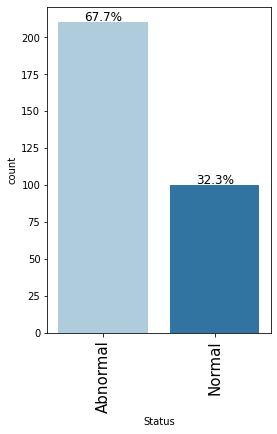

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(loan, "Status", perc=True)

* 66.9% of the customers are delinquent

## Observations on term

count    310.000000
mean      25.645981
std       10.450558
min        7.007900
25%       17.189075
50%       24.931950
75%       33.979600
max       44.341200
Name: scoliosis_slope, dtype: float64


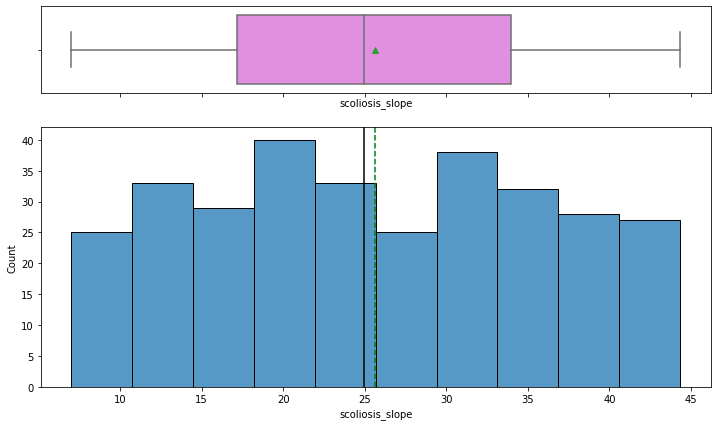

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(loan, "scoliosis_slope", figsize=(12, 7), kde=False, bins=None)
# pelvic_incidence
# pelvic tilt
# lumbar_lordosis_angle
# sacral_slope
# pelvic_radius
# degree_spondylolisthesis
# pelvic_slope
# Direct_tilt
# thoracic_slope
# cervical_tilt
# sacrum_angle
# scoliosis_slope

* There are more male applicants (56.8%) than female applicants (43.2%)

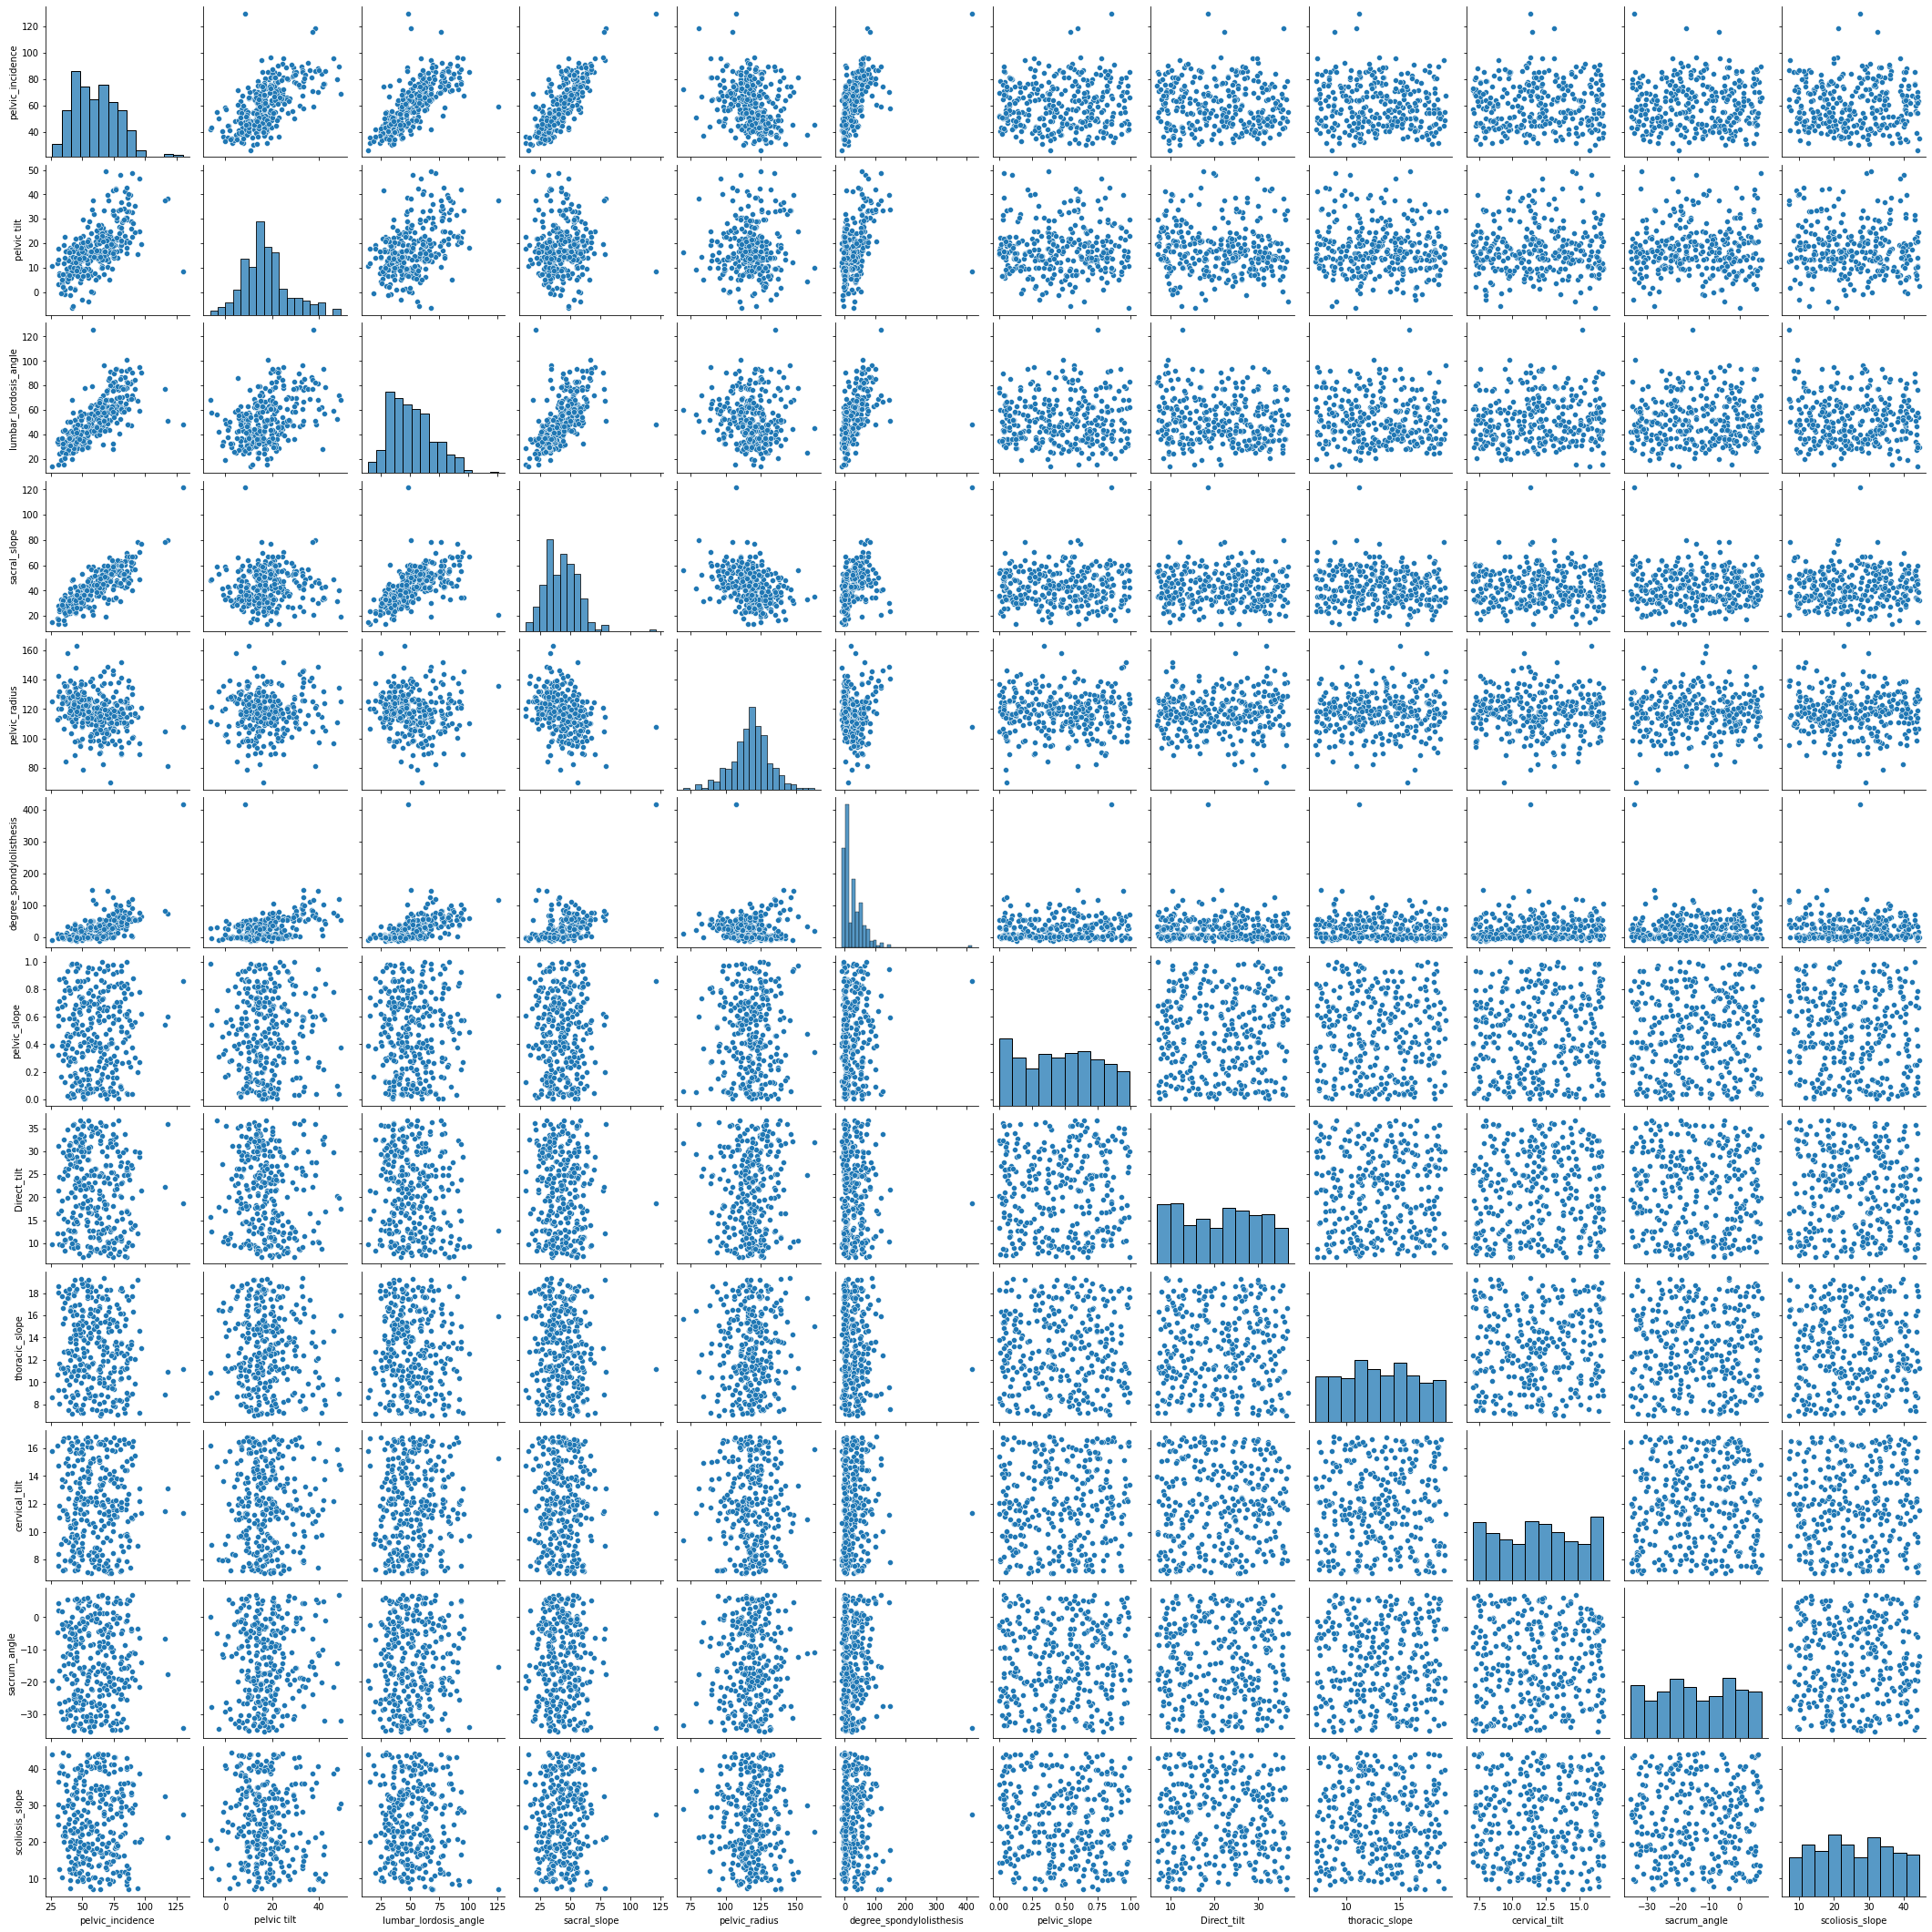

<IPython.core.display.Javascript object>

In [14]:
sns.pairplot(loan)

In [15]:
loan.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


<IPython.core.display.Javascript object>

In [16]:
loan["Status"] = loan["Status"].apply(lambda x: 1 if x == "Abnormal" else 0)

<IPython.core.display.Javascript object>

## Split Data

In [17]:
X = loan.drop(["Status"], axis=1)
y = loan["Status"]

<IPython.core.display.Javascript object>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [19]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 217
Number of rows in test data = 93


<IPython.core.display.Javascript object>

In [20]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.663594
0    0.336406
Name: Status, dtype: float64
Percentage of classes in test set:
1    0.709677
0    0.290323
Name: Status, dtype: float64


<IPython.core.display.Javascript object>

## Build Decision Tree Model

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent). 


### Which case is more important? 

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [21]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [22]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [58]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [78]:
# model1 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion="entropy")
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion="gini")
# model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

<IPython.core.display.Javascript object>

In [79]:
# decision_tree_perf_train1 = model_performance_classification_sklearn(
#     model1, X_train, y_train
# )
# decision_tree_perf_train1

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [80]:
# decision_tree_perf_train2 = model_performance_classification_sklearn(
#     model2, X_train, y_train
# )
# decision_tree_perf_train2

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [59]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

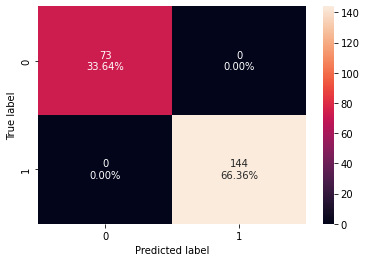

<IPython.core.display.Javascript object>

In [25]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [60]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.774194,0.787879,0.881356,0.832


<IPython.core.display.Javascript object>

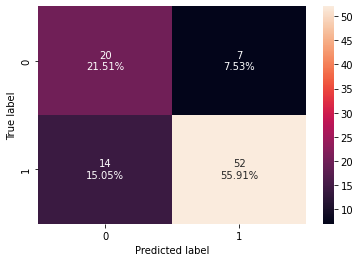

<IPython.core.display.Javascript object>

In [61]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

## Visualizing the Decision Tree

In [28]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


<IPython.core.display.Javascript object>

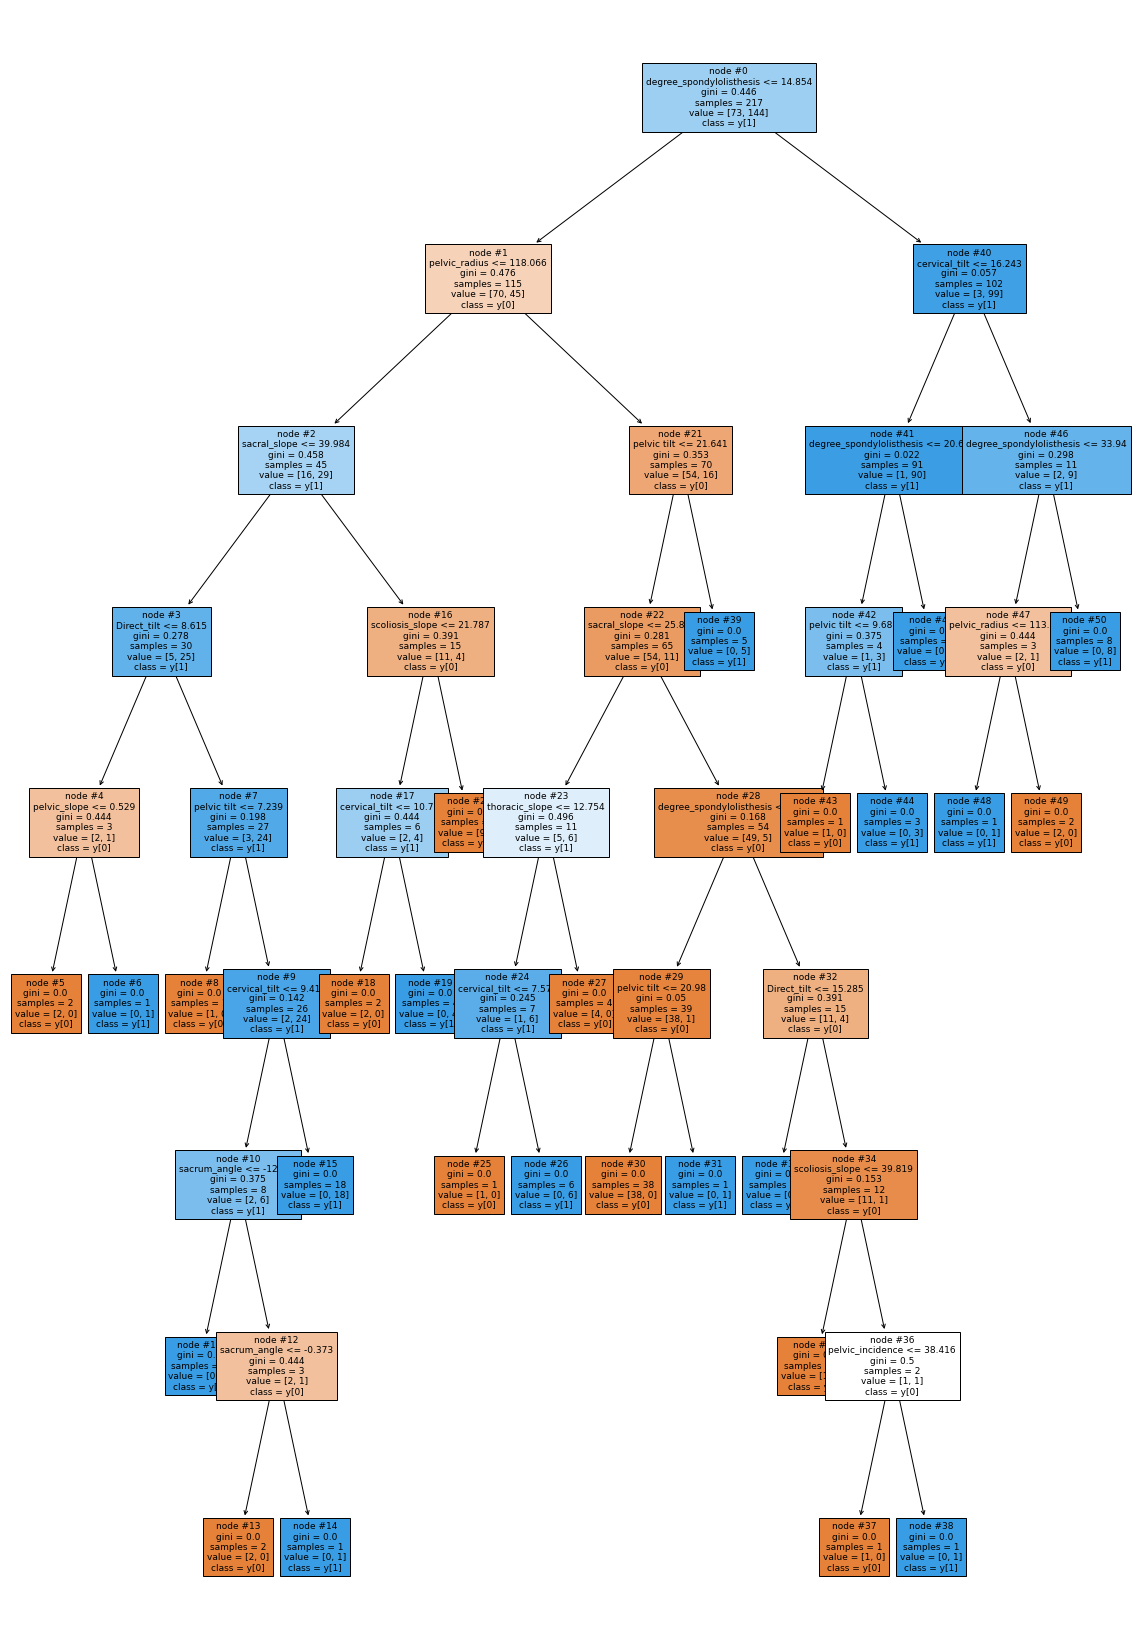

<IPython.core.display.Javascript object>

In [29]:
# plt.figure(figsize=(20, 30))

# out = tree.plot_tree(
#     model,
#     feature_names=feature_names,
#     filled=True,
#     fontsize=9,
#     node_ids=True,
#     class_names=True,
# )
# for o in out:
#     arrow = o.arrow_patch
#     if arrow is not None:
#         arrow.set_edgecolor("black")
#         arrow.set_linewidth(1)
# plt.show()

In [30]:
# Text report showing the rules of a decision tree -

# print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 8.62
|   |   |   |   |--- pelvic_slope <= 0.53
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- pelvic_slope >  0.53
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Direct_tilt >  8.62
|   |   |   |   |--- pelvic tilt <= 7.24
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- pelvic tilt >  7.24
|   |   |   |   |   |--- cervical_tilt <= 9.42
|   |   |   |   |   |   |--- sacrum_angle <= -12.82
|   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |--- sacrum_angle >  -12.82
|   |   |   |   |   |   |   |--- sacrum_angle <= -0.37
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- sacrum_angle >  -0.37
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |---

<IPython.core.display.Javascript object>

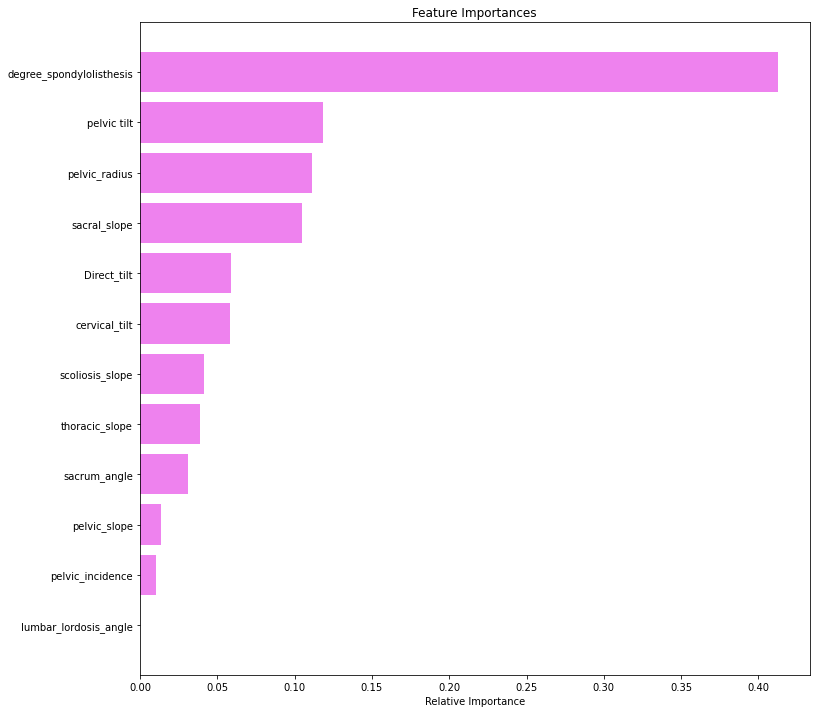

<IPython.core.display.Javascript object>

In [31]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

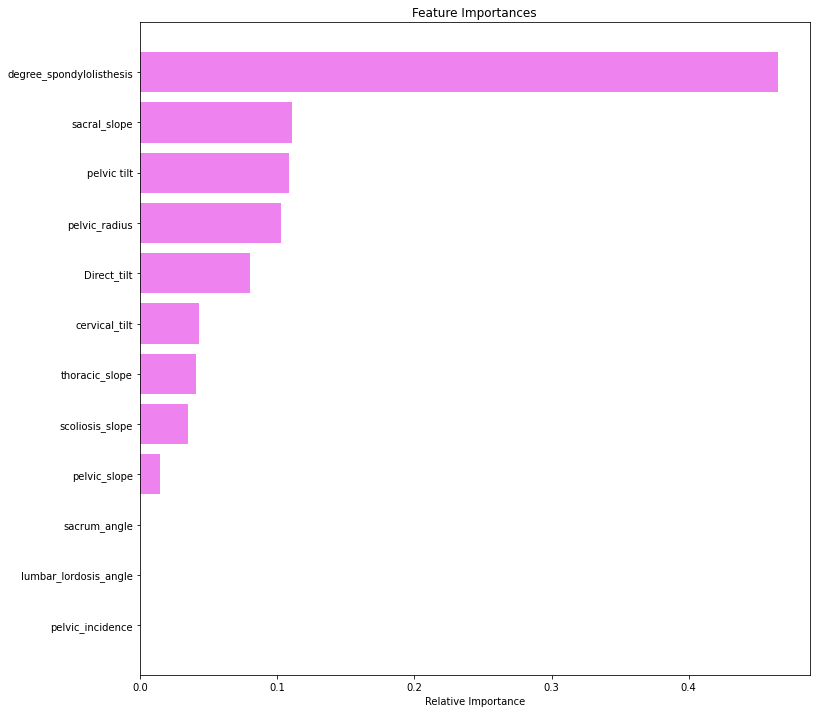

<IPython.core.display.Javascript object>

In [74]:
# estimator1 = DecisionTreeClassifier(random_state=1)
# parameters = {"max_depth": np.arange(1, 9)}
# # Type of scoring used to compare parameter combinations
# acc_scorer1 = make_scorer(recall_score)
# # Run the grid search
# grid_obj1 = GridSearchCV(estimator1, parameters, scoring=acc_scorer1, cv=5)
# grid_obj1 = grid_obj1.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# estimator1 = grid_obj1.best_estimator_

# importances1 = estimator1.feature_importances_
# indices1 = np.argsort(importances1)

# plt.figure(figsize=(12, 12))
# plt.title("Feature Importances")
# plt.barh(range(len(indices1)), importances1[indices1], color="violet", align="center")
# plt.yticks(range(len(indices1)), [feature_names[i] for i in indices1])
# plt.xlabel("Relative Importance")
# plt.show()

In [81]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [82]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.967742,0.979167,0.972414,0.975779


<IPython.core.display.Javascript object>

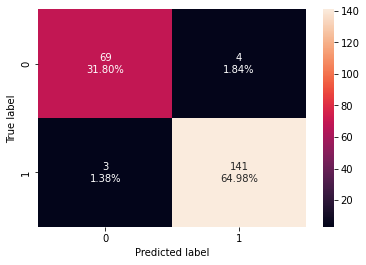

<IPython.core.display.Javascript object>

In [83]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

#### Checking model performance on test set

In [84]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.741935,0.80303,0.828125,0.815385


<IPython.core.display.Javascript object>

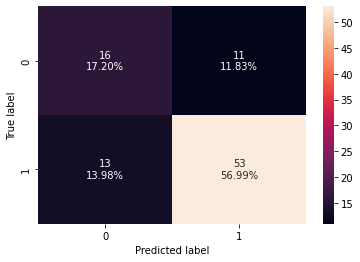

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

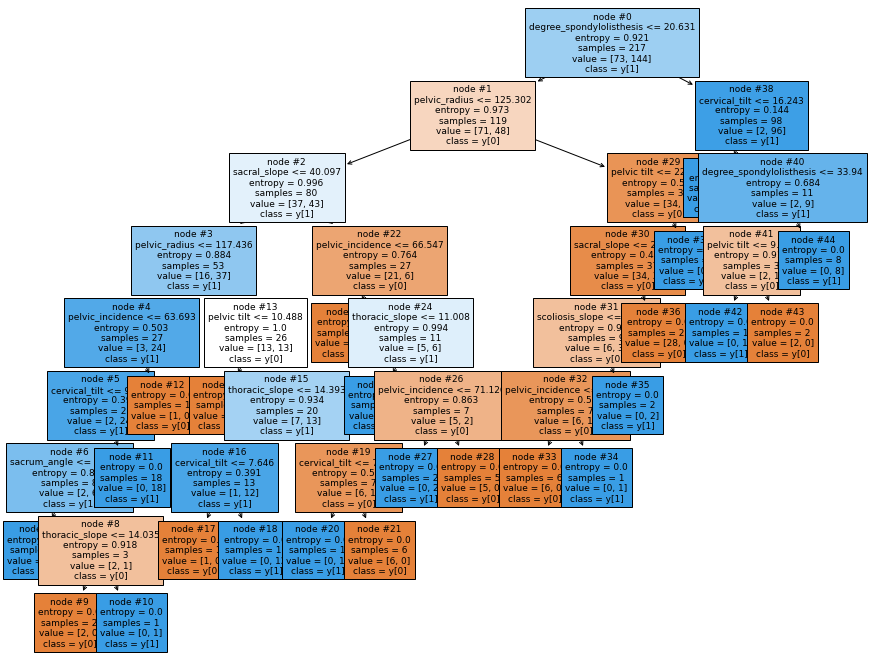

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

## Cost Complexity Pruning

In [86]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [87]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568


<IPython.core.display.Javascript object>

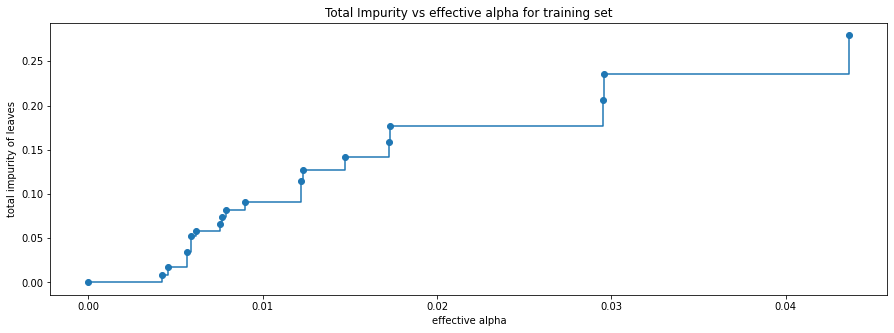

<IPython.core.display.Javascript object>

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16718273972032832


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

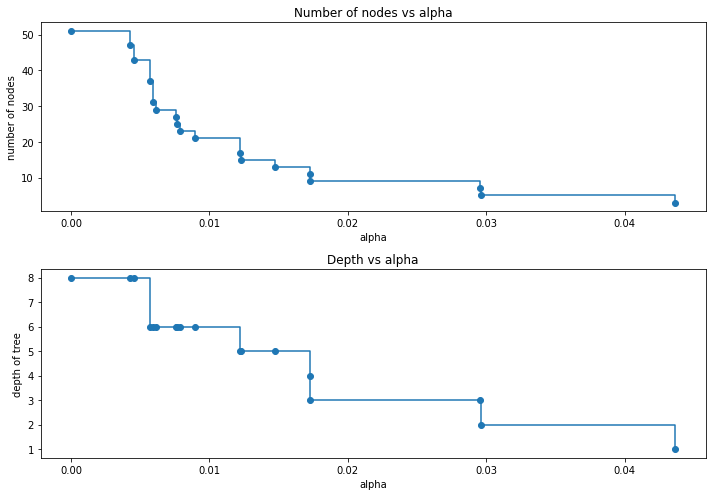

<IPython.core.display.Javascript object>

In [90]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [91]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [92]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

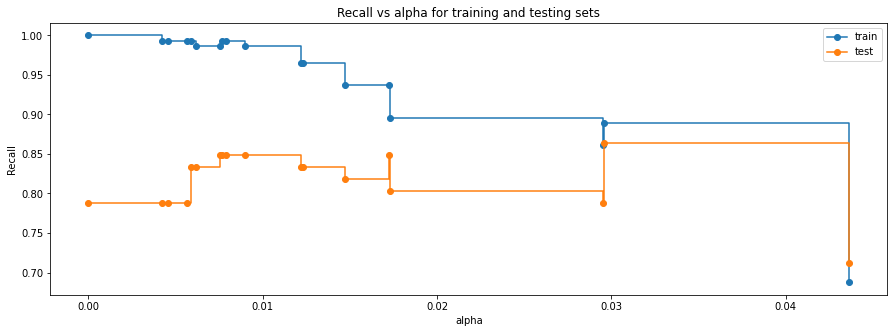

<IPython.core.display.Javascript object>

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [95]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.029595494111623127, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [96]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.83871,0.888889,0.870748,0.879725


<IPython.core.display.Javascript object>

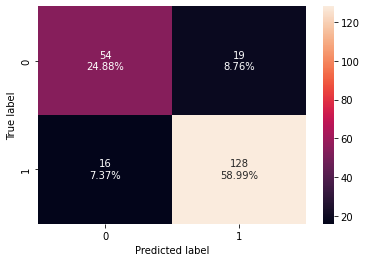

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [98]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.827957,0.863636,0.890625,0.876923


<IPython.core.display.Javascript object>

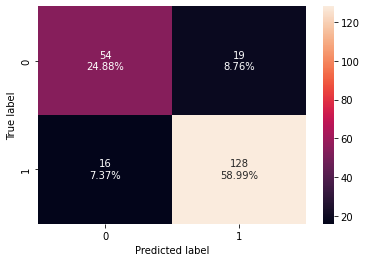

<IPython.core.display.Javascript object>

In [50]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

## Visualizing the Decision Tree

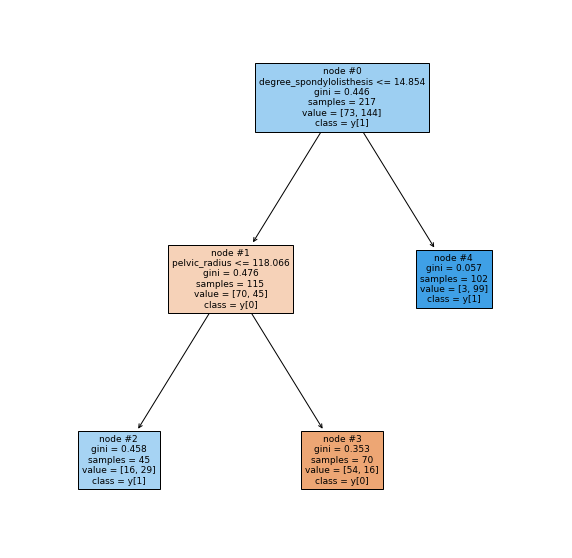

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [52]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- weights: [16.00, 29.00] class: 1
|   |--- pelvic_radius >  118.07
|   |   |--- weights: [54.00, 16.00] class: 0
|--- degree_spondylolisthesis >  14.85
|   |--- weights: [3.00, 99.00] class: 1



<IPython.core.display.Javascript object>

In [53]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
degree_spondylolisthesis  0.792918
pelvic_radius             0.207082
pelvic_incidence          0.000000
pelvic tilt               0.000000
lumbar_lordosis_angle     0.000000
sacral_slope              0.000000
pelvic_slope              0.000000
Direct_tilt               0.000000
thoracic_slope            0.000000
cervical_tilt             0.000000
sacrum_angle              0.000000
scoliosis_slope           0.000000


<IPython.core.display.Javascript object>

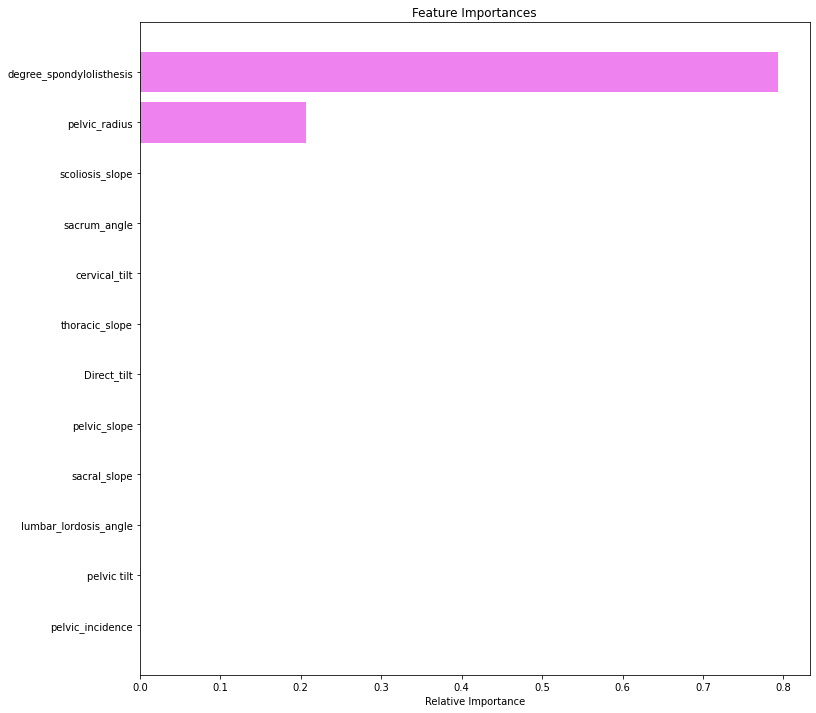

<IPython.core.display.Javascript object>

In [54]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of the loan, and gender remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [55]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.838710
Recall,1.0,1.0,0.888889
Precision,1.0,1.0,0.870748
F1,1.0,1.0,0.879725


<IPython.core.display.Javascript object>

In [56]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.774194,0.795699,0.827957
Recall,0.787879,0.833333,0.863636
Precision,0.881356,0.873016,0.890625
F1,0.832000,0.852713,0.876923


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Business Insights

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36 month term loan and 
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.